In [1]:
import pandas as pd
import numpy as np
import torch

from skimage.color import rgb2lab, lab2rgb
from matplotlib import pyplot as plt

from repalette.utils.data import PairRecolorDataset

%matplotlib inline

In [2]:
data = pd.read_csv("../design-seeds.csv")
data.head()

,image_path,palette_path
0,data/0.jpg,data/0.npy
1,data/1.jpg,data/1.npy
2,data/2.jpg,data/2.npy
3,data/3.jpg,data/3.npy
4,data/4.jpg,data/4.npy


In [6]:
multiplier = 8
dataset = PairRecolorDataset(data, multiplier=multiplier)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=multiplier)

In [7]:
batch = next(iter(data_loader))

/home/esthete/anaconda3/envs/repalette/lib/python3.7/site-packages/skimage/color/colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 4931 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/esthete/anaconda3/envs/repalette/lib/python3.7/site-packages/skimage/color/colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/esthete/anaconda3/envs/repalette/lib/python3.7/site-packages/skimage/color/colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 4950 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/esthete/anaconda3/envs/repalette/lib/python3.7/site-packages/skimage/color/colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 5041 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/home/esthete/anaconda3/envs/repalette/lib/python3.7/site-packages/skimage/color/colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 4914 pix

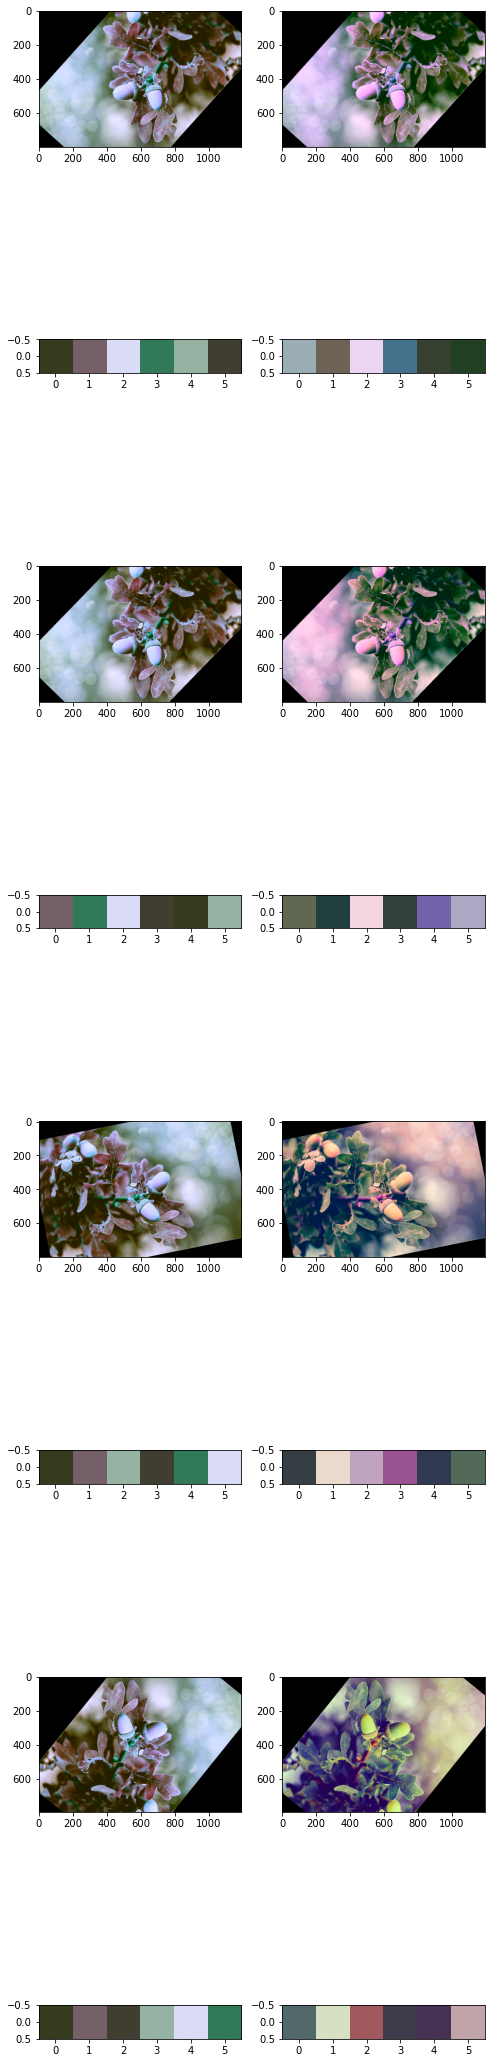

In [8]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(8, 40))
for i in range(4):
    ax[2*i, 0].imshow(lab2rgb(batch[0][0][i].permute(1, 2, 0)))
    ax[2*i+1, 0].imshow(lab2rgb(batch[0][1][i].permute(1, 2, 0)))
    ax[2*i, 1].imshow(lab2rgb(batch[1][0][i].permute(1, 2, 0)))
    ax[2*i+1, 1].imshow(lab2rgb(batch[1][1][i].permute(1, 2, 0)))
plt.show()